In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
X=df.iloc[:,1:22]
y=df.iloc[:,0]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (253680, 21) 
y -  (253680,)


# MLP

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],  # Number of neurons in each hidden layer
    'activation': ['logistic'],  # Sigmoid activation function
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
}

# Create an MLP classifier with the sigmoid activation function
mlp = MLPClassifier(activation='logistic')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_mlp = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best MLP model on the test set
y_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_params)
print("Execution Time:", execution_time, "seconds")


# ADA

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming your data is loaded in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners (base estimators)
    'learning_rate': [0.01, 0.1, 1, 10]  # Weight applied to each weak learner
}

# Create the AdaBoostClassifier model
adaboost = AdaBoostClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)
start_time = time.time()
# Fit the model using RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)
end_time = time.time()
tot_time = end_time - start_time
# Get the best estimator from RandomizedSearchCV
best_adaboost_random = random_search.best_estimator_

# Predict probabilities on the test set using the best model
y_proba_random = best_adaboost_random.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc_random = roc_auc_score(y_test, y_proba_random)

# Generate ROC curve
fpr_random, tpr_random, thresholds_random = roc_curve(y_test, y_proba_random)

# Predict on the test set using the best model
y_pred_random = best_adaboost_random.predict(X_test)

# Calculate metrics
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random)
recall_random = recall_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)

# Calculate confusion matrix
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Print the results
print("Randomized Search Test Accuracy: {:.4f}".format(accuracy_random))
print("Randomized Search ROC AUC: {:.2f}".format(roc_auc_random))
print("Randomized Search Sensitivity (Recall): {:.2f}".format(recall_random))
print("Randomized Search Specificity: {:.2f}".format(conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])))
print("Randomized Search F1 Score: {:.2f}".format(f1_random))
print("Execution time: {:.2f}".format(tot_time))

# RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Assuming you have X and y defined for your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a broader range of hyperparameters for Random Forest
param_distributions = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define StratifiedKFold cross-validator with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

start_time = time.time()
# Perform Random Search Cross Validation for Random Forest with custom cross-validator
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=stratified_kfold, random_state=42)
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluate the model on the test data
test_accuracy = random_search.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Execution Time: {:.2f} seconds".format(end_time - start_time))


# XG

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for XGBoost
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],  # Maximum depth of a tree
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of columns when constructing each tree
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_xgb = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best XGBoost model on the test set
y_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


# CAT

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier  # Import CatBoost classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for CatBoost
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'iterations': [50, 100, 150],  # Number of boosting rounds
    'depth': [4, 6, 8, 10],  # Maximum depth of a tree
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_catboost = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best CatBoost model on the test set
y_pred = best_catboost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.5793496	total: 252ms	remaining: 12.4s
1:	learn: 0.4992856	total: 369ms	remaining: 8.86s
2:	learn: 0.4392037	total: 479ms	remaining: 7.51s
3:	learn: 0.3946272	total: 603ms	remaining: 6.93s
4:	learn: 0.3638987	total: 728ms	remaining: 6.55s
5:	learn: 0.3386173	total: 879ms	remaining: 6.44s
6:	learn: 0.3194100	total: 1.03s	remaining: 6.33s
7:	learn: 0.3029333	total: 1.16s	remaining: 6.06s
8:	learn: 0.2899229	total: 1.28s	remaining: 5.83s
9:	learn: 0.2813164	total: 1.39s	remaining: 5.55s
10:	learn: 0.2731472	total: 1.54s	remaining: 5.46s
11:	learn: 0.2683353	total: 1.68s	remaining: 5.31s
12:	learn: 0.2630569	total: 1.85s	remaining: 5.26s
13:	learn: 0.2596540	total: 1.95s	remaining: 5.02s
14:	learn: 0.2562683	total: 2.1s	remaining: 4.91s
15:	learn: 0.2537430	total: 2.21s	remaining: 4.7s
16:	learn: 0.

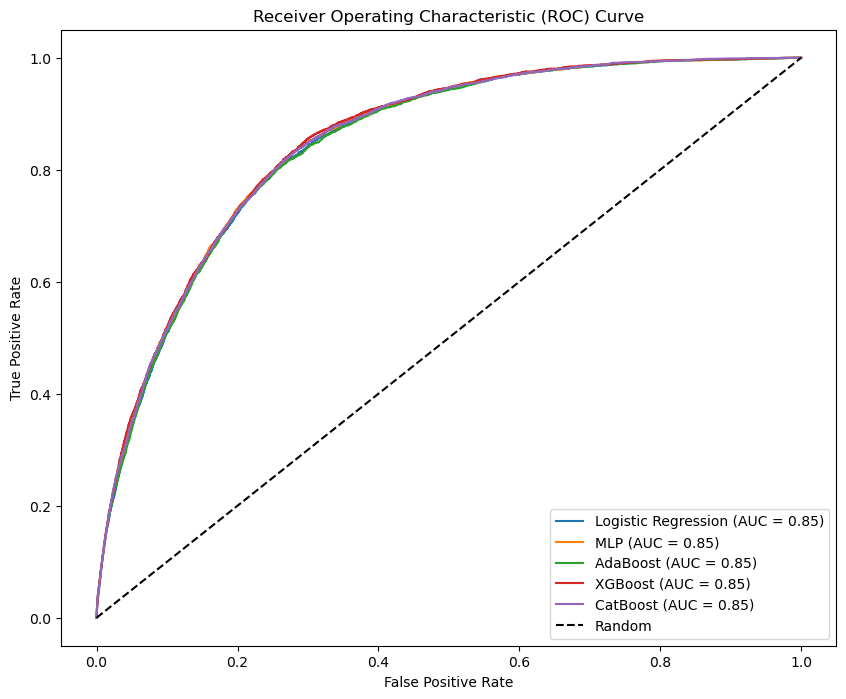

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time

# Assuming you have X and y defined for your features and target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
param_dist_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
logreg = LogisticRegression(random_state=42, max_iter=1000)
random_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist_logreg, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_search_logreg.fit(X_train, y_train)
best_logreg = random_search_logreg.best_estimator_

# MLP Classifier
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}
mlp = MLPClassifier(activation='logistic')
random_search_mlp = RandomizedSearchCV(mlp, param_distributions=param_dist_mlp, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_search_mlp.fit(X_train, y_train)
best_mlp = random_search_mlp.best_estimator_

# AdaBoost Classifier
param_dist_adaboost = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
adaboost = AdaBoostClassifier(random_state=42)
random_search_adaboost = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist_adaboost, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)
random_search_adaboost.fit(X_train, y_train)
best_adaboost = random_search_adaboost.best_estimator_

# XGBoost Classifier
param_dist_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
}
xgb_classifier = XGBClassifier()
random_search_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist_xgb, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

# CatBoost Classifier
param_dist_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [50, 100, 150],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
catboost_classifier = CatBoostClassifier()
random_search_catboost = RandomizedSearchCV(catboost_classifier, param_distributions=param_dist_catboost, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
random_search_catboost.fit(X_train, y_train)
best_catboost = random_search_catboost.best_estimator_

# Calculate ROC curve and AUC for each model
classifiers = [best_logreg, best_mlp, best_adaboost, best_xgb, best_catboost]
labels = ['Logistic Regression', 'MLP', 'AdaBoost', 'XGBoost', 'CatBoost']
plt.figure(figsize=(10, 8))

for clf, label in zip(classifiers, labels):
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
